In [268]:
import numpy as np

def to_binary(n, digits=8):
    binary_digits = []
    for _ in range(digits):
        binary_digits.append(int(n % 2))
        n = int(n / 2)
    return binary_digits[::-1]

def step(state, rule_bin):
    """ Takes a complete state vector of the system at a time point
    and provides the new value for Center """
    # calculate the encoding vector based on the rule binary
    # the sum of the element-wise product of this vector and the inputs
    # is the encoded state
    input_size = int(np.log2(rule_bin.shape[0]))
    expos = np.arange(input_size, 0, -1) - 1
    enc = 2**expos

    # we need to get new 3-vectors (Left, Center, Right) for each position
    # can use roll to "shift" the whole array left and right on a circle
    # and vstack to set them up as a list of 3-vectors
    vec = np.vstack((np.roll(state, 1), state, np.roll(state, -1))).astype(np.int8)
    encoded = vec.T.dot(enc).astype(np.int8)

    # lookup the index corresponding to the transition
    return rule_bin[sum(enc) - encoded]

# user params
eca_rule = 110
cells = 1000
times = int(cells / 2)

# initialize grid and rules
binary = np.array(to_binary(eca_rule))
init = np.random.choice([0, 1], size=cells)
# init = np.zeros(cells + 1)
# init[int(cells / 2)] = 1
states = np.zeros((times, init.shape[0]))
states[0] = init

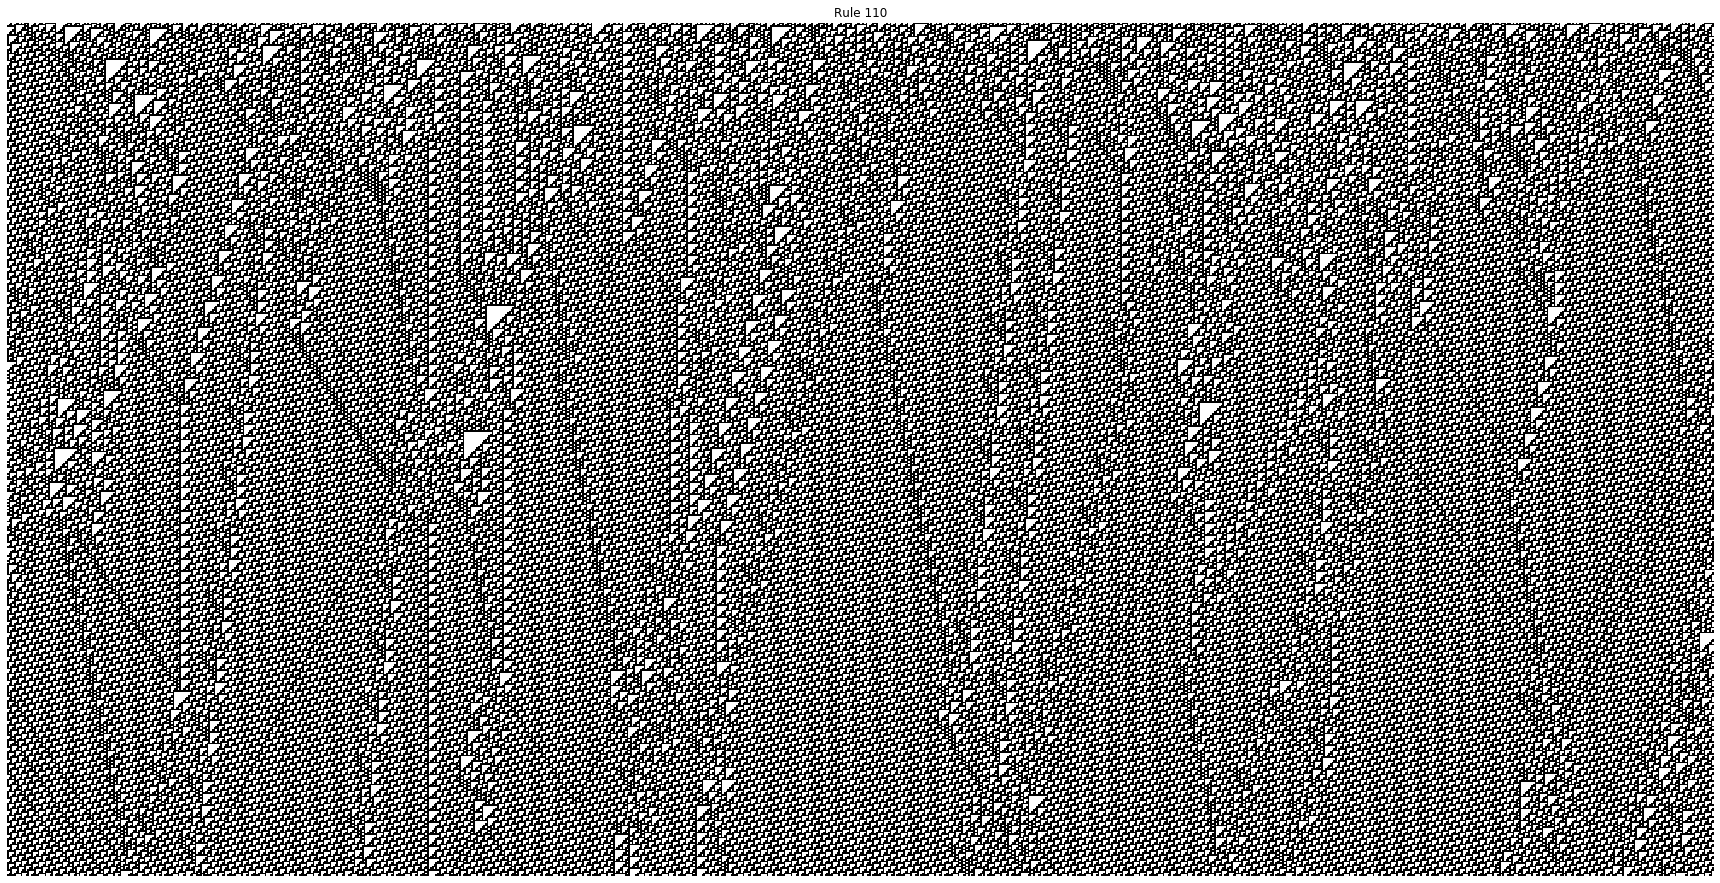

In [269]:
import matplotlib.pyplot as plt
for t in range(1, times):
    states[t] = step(states[t - 1], binary)
fig, ax = plt.subplots(figsize=(24,14))
ax.imshow(states, interpolation='none', cmap=plt.cm.binary)
ax.set_axis_off()
ax.set_title('Rule ' + str(eca_rule))
plt.tight_layout()
plt.savefig('eca.png')

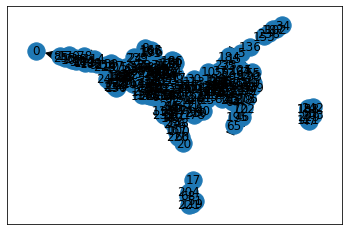

In [281]:
import networkx as nx

STG = nx.DiGraph()

# user params
cells = 8

state_labels = np.arange(2**cells)

# get rule in binary form
brule = np.array(to_binary(eca_rule))

# we want to encode our state vectors in big numbers
expos = np.arange(cells, 0, -1) - 1
enc = 2**expos

for dec in state_labels:
    state = np.array(to_binary(dec, digits=cells))
    next_state = step(state, brule)
    next_dec = np.sum(enc * next_state).astype(np.int)
    STG.add_edge(dec, next_dec)

nx.draw_networkx(STG, nodesize=5, arrowsize=20)
nx.write_graphml(STG, 'rule110.graphml')

In [253]:
2**5

32